In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
# os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger



TensoFlow Version:  2.12.0


In [4]:
%pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
data = []
labels = []
# We have 43 Classes
classes = 43


In [6]:
curr_path = "/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/"

In [7]:
for i in range(classes):
    path = os.path.join(curr_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [10]:
data = np.array(data)
labels = np.array(labels)

In [11]:
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data.npy',data)
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target.npy',labels)

In [12]:
data=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data.npy')
labels=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target.npy')

In [13]:
print(data.shape, labels.shape)

(39289, 32, 32, 3) (39289,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [16]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (31431, 32, 32, 3)
Test Shape : (7858, 32, 32, 3)


**Resnet Model**

In [ ]:
resnet = ResNet50(weights= None, include_top=False, input_shape= (32,32,3))

In [ ]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [ ]:
# model.summary()

In [ ]:
# plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [ ]:
n_epochs = 50
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
983/983 [==============================] - 119s 58ms/step - loss: 4.1635 - accuracy: 0.1830 - val_loss: 3.7589 - val_accuracy: 0.0816 - lr: 0.0010
Epoch 2/50
983/983 [==============================] - 61s 62ms/step - loss: 3.4394 - accuracy: 0.2525 - val_loss: 2.1710 - val_accuracy: 0.3671 - lr: 0.0010
Epoch 3/50
983/983 [==============================] - 50s 51ms/step - loss: 2.2093 - accuracy: 0.4720 - val_loss: 2.5253 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 4/50
983/983 [==============================] - 53s 54ms/step - loss: 1.7040 - accuracy: 0.5972 - val_loss: 3.6348 - val_accuracy: 0.4631 - lr: 0.0010
Epoch 5/50
983/983 [==============================] - 51s 52ms/step - loss: 2.1919 - accuracy: 0.4767 - val_loss: 3.2362 - val_accuracy: 0.3570 - lr: 0.0010
Epoch 6/50
983/983 [==============================] - 50s 51ms/step - loss: 1.4735 - accuracy: 0.6443 - val_loss: 8.6103 - val_accuracy: 0.4149 - lr: 0.0010
Epoch 7/50
983/983 [==============================] - 49s

In [ ]:
# Saving the model
model.save('./drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myResnet_Final.h5')

In [8]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myResnet_Final.h5')

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

246/246 [==============================] - 12s 12ms/step - loss: 0.0453 - accuracy: 0.9877
Accuracy:  0.9876558780670166 
Loss    :  0.04530058056116104


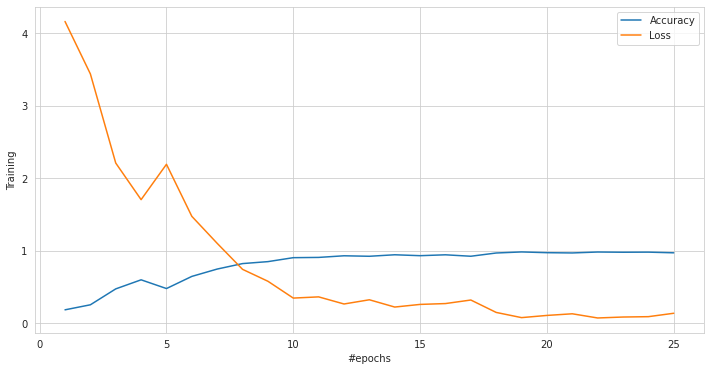

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

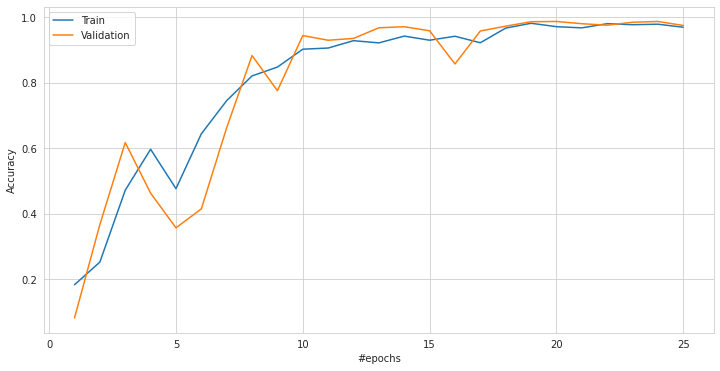

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

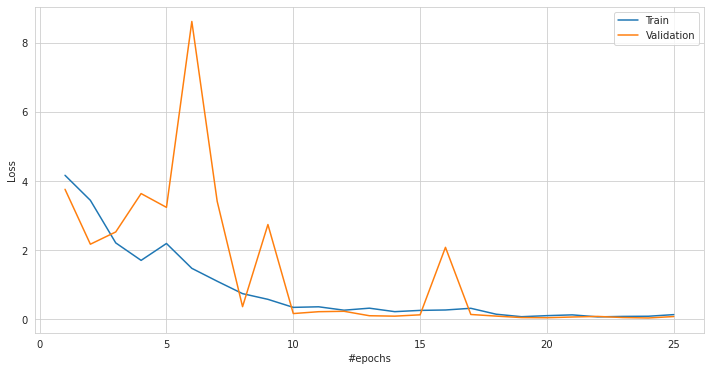

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
%%time
pred = np.argmax(model.predict(X_test), axis = 1)

246/246 [==============================] - 3s 12ms/step
CPU times: user 3 s, sys: 45.2 ms, total: 3.04 s
Wall time: 3.2 s


In [ ]:
# labels = [class_labels[i] for i in range(43)]
# print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

In [ ]:
# cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
# plt.figure(figsize=(16,16))
# sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8bec7ad280> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
# cls_acc = pd.DataFrame({'Class_Label':[class_labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

1/1 [==============================] - 0s 23ms/step


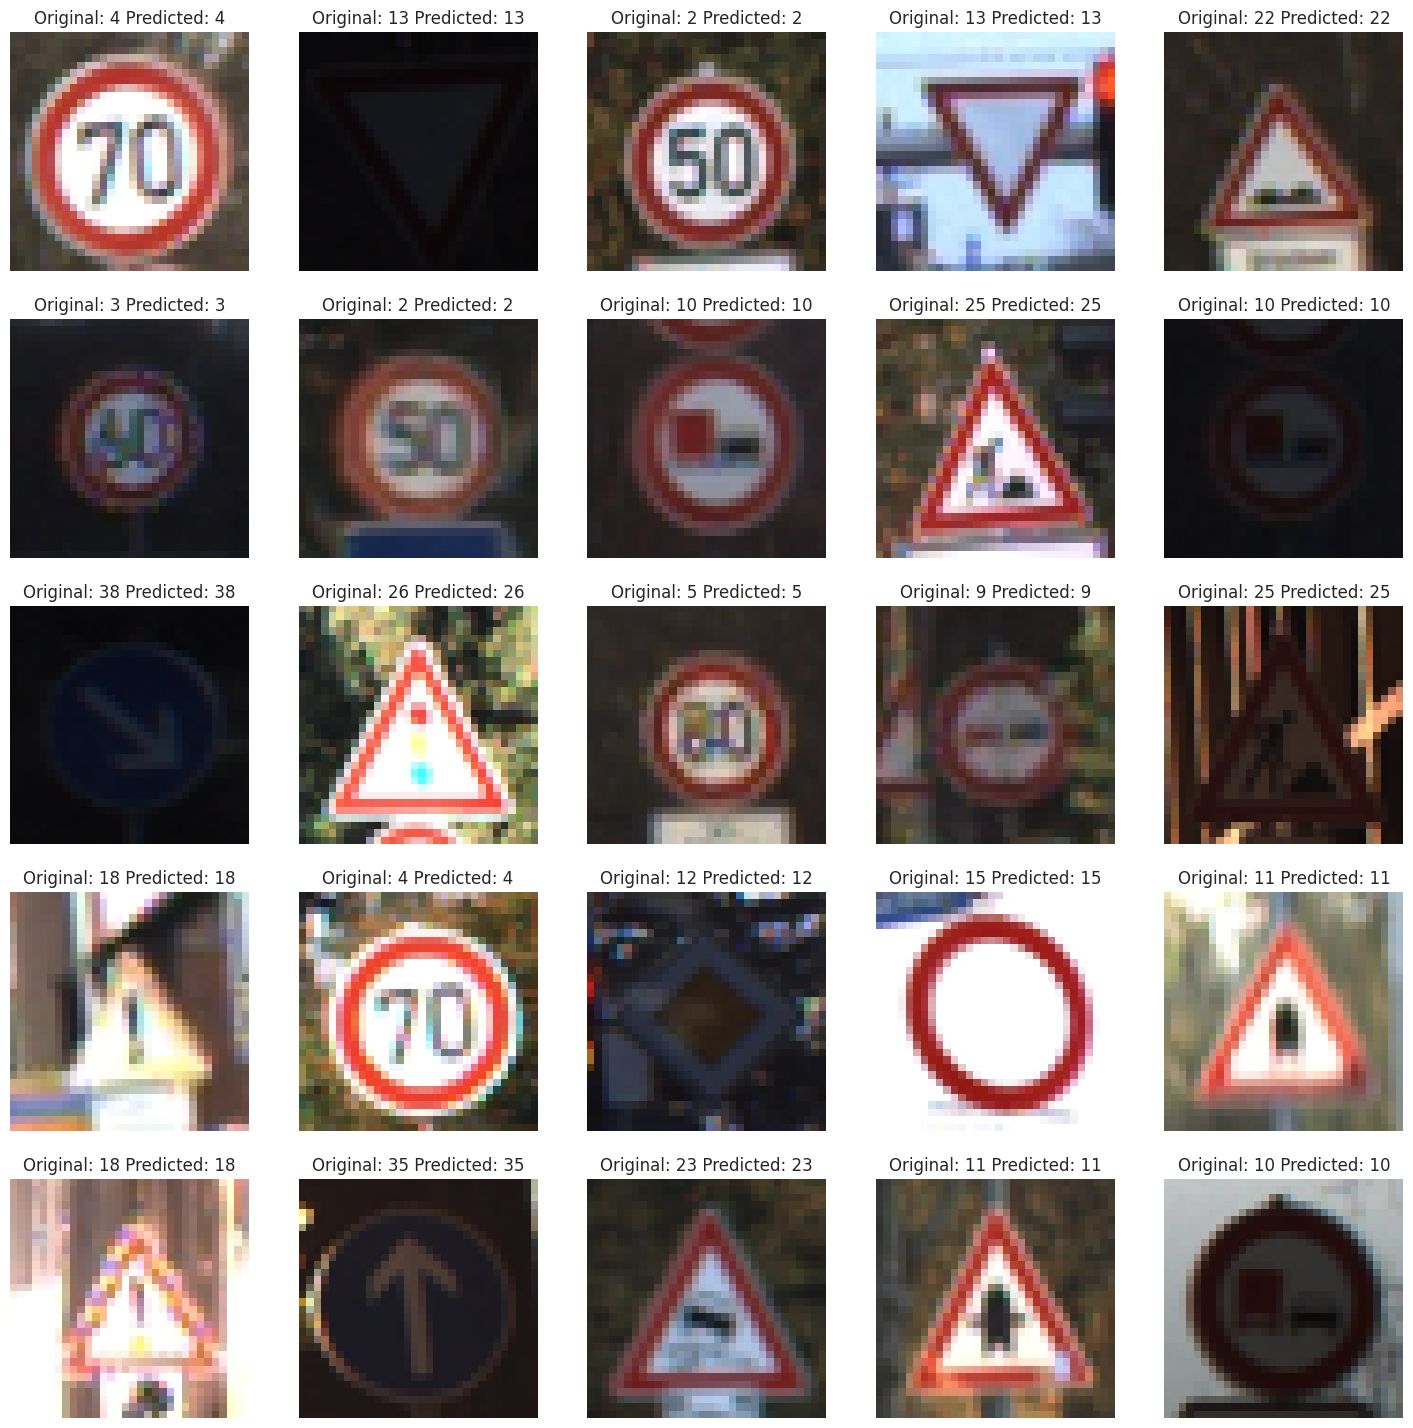

In [18]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 32, 32, 3)))))

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

246/246 [==============================] - 3s 13ms/step - loss: 0.0453 - accuracy: 0.9877
Accuracy:  0.9876558780670166 
Loss    :  0.045300547033548355


**VGG16**

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

In [20]:
vgg = VGG16(weights= "imagenet", include_top=False, input_shape= (32,32,3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = vgg.input, outputs = predictions)

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
# plot_model(model2, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [ ]:
n_epochs = 50
history =  model2.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
983/983 [==============================] - 36s 31ms/step - loss: 3.0072 - accuracy: 0.1873 - val_loss: 1.6687 - val_accuracy: 0.4627 - lr: 0.0010
Epoch 2/50
983/983 [==============================] - 29s 30ms/step - loss: 1.3457 - accuracy: 0.5583 - val_loss: 0.7891 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 3/50
983/983 [==============================] - 29s 30ms/step - loss: 0.7810 - accuracy: 0.7442 - val_loss: 2.2661 - val_accuracy: 0.6712 - lr: 0.0010
Epoch 4/50
983/983 [==============================] - 29s 29ms/step - loss: 0.7182 - accuracy: 0.7988 - val_loss: 0.2404 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 5/50
983/983 [==============================] - 29s 30ms/step - loss: 0.3135 - accuracy: 0.9061 - val_loss: 0.2674 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 6/50
983/983 [==============================] - 30s 30ms/step - loss: 0.2575 - accuracy: 0.9256 - val_loss: 0.1374 - val_accuracy: 0.9572 - lr: 0.0010
Epoch 7/50
983/983 [==============================] - 29s 

In [ ]:
# Saving the model
model2.save('./drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myVGG16_Final.h5')

In [22]:
from keras.models import load_model

model2 = load_model('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myVGG16_Final.h5')

In [23]:
loss, acc = model2.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

246/246 [==============================] - 3s 9ms/step - loss: 0.0583 - accuracy: 0.9863
Accuracy:  0.9862560629844666 
Loss    :  0.05826607719063759


1/1 [==============================] - 0s 23ms/step


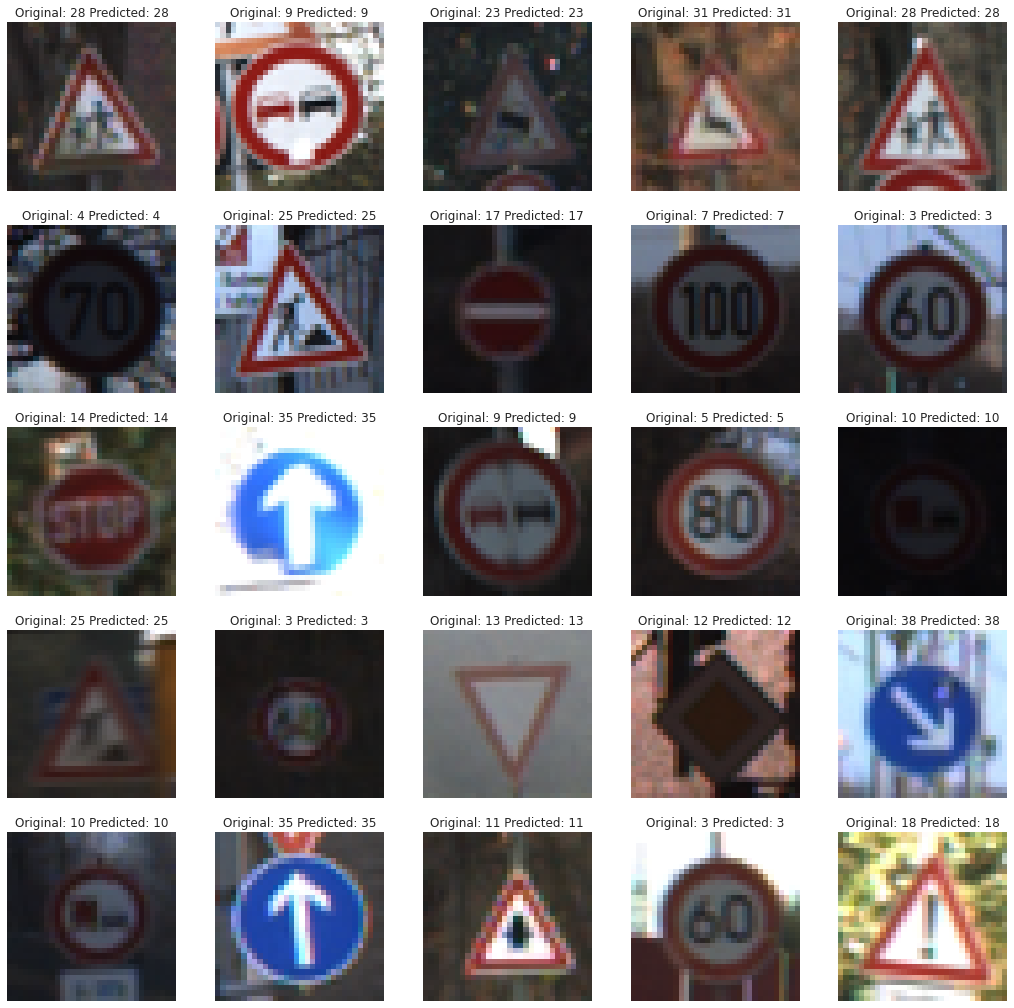

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model2.predict(X_test[r].reshape(1, 32, 32, 3)))))

InceptionV3

In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [28]:
data2 = []
labels2 = []
# We have 43 Classes
classes = 43



In [29]:
for i in range(classes):
    path = os.path.join(curr_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((75,75))
            image = np.array(image)
            data2.append(image)
            labels2.append(i)
        except Exception as e:
            print(e)

In [30]:
data2 = np.array(data2)
labels2 = np.array(labels2)

In [31]:
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data2.npy',data2)
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target2.npy',labels2)


In [32]:
data2=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data2.npy')
labels2=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target2.npy')

In [33]:
print(data.shape, labels.shape)

(39289, 32, 32, 3) (39289,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.2, random_state=0)

In [35]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [36]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (31431, 75, 75, 3)
Test Shape : (7858, 75, 75, 3)


In [ ]:
incep = InceptionV3(weights= "imagenet", include_top=False, input_shape= (75,75,3))

In [ ]:
x = incep.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model3 = Model(inputs = incep.input, outputs = predictions)

In [ ]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_94 (Conv2D)             (None, 37, 37, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 37, 37, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 37, 37, 32)   0           ['batch_normalization_94[0]

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [ ]:
n_epochs = 50
history =  model3.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
983/983 [==============================] - 131s 90ms/step - loss: 0.6156 - accuracy: 0.8396 - val_loss: 0.2103 - val_accuracy: 0.9496 - lr: 0.0010
Epoch 2/50
983/983 [==============================] - 74s 76ms/step - loss: 0.1183 - accuracy: 0.9718 - val_loss: 0.1617 - val_accuracy: 0.9569 - lr: 0.0010
Epoch 3/50
983/983 [==============================] - 74s 75ms/step - loss: 0.1231 - accuracy: 0.9737 - val_loss: 0.1299 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 4/50
983/983 [==============================] - 72s 73ms/step - loss: 0.0519 - accuracy: 0.9877 - val_loss: 0.0455 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 5/50
983/983 [==============================] - 71s 72ms/step - loss: 0.0560 - accuracy: 0.9881 - val_loss: 0.0358 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 6/50
983/983 [==============================] - 72s 73ms/step - loss: 0.0554 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 7/50
983/983 [==============================] - 70s

In [ ]:
# Saving the model
model3.save('./drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myInceptionV3_Final.h5')

In [37]:
from keras.models import load_model

model3 = load_model('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myInceptionV3_Final.h5')

In [38]:
loss, acc = model3.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)



246/246 [==============================] - 7s 20ms/step - loss: 0.0455 - accuracy: 0.9922
Accuracy:  0.9922372102737427 
Loss    :  0.04549526423215866


1/1 [==============================] - 0s 28ms/step


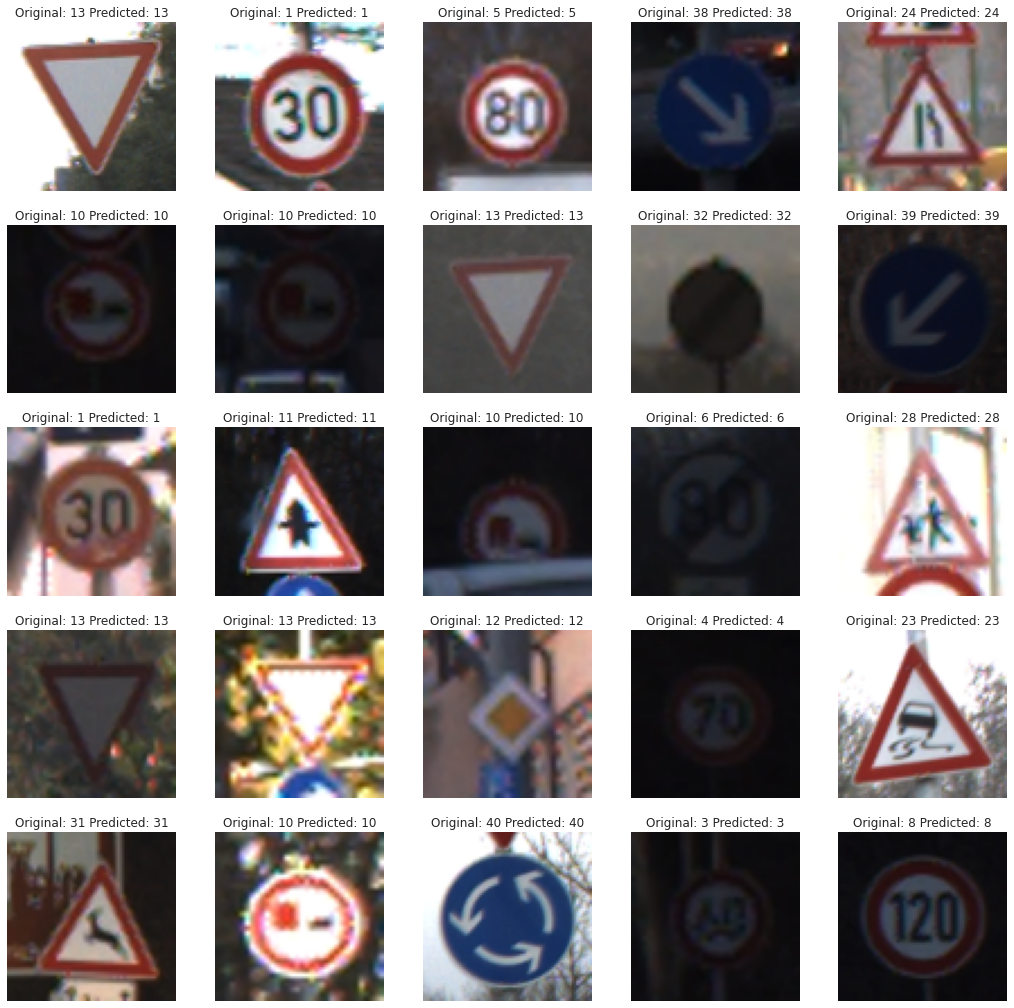

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model3.predict(X_test[r].reshape(1, 75, 75, 3)))))

**Xception**

In [2]:
from tensorflow.keras.applications.xception import Xception

In [2]:
# a = []
# while(1):
#   a.append("1")

In [7]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
# os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

TensoFlow Version:  2.11.0


In [8]:
data3 = []
labels3 = []
# We have 43 Classes
classes = 43


In [9]:
import os
from PIL import Image

In [11]:
# curr_path = "/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/"
cur_path = os.getcwd()
cur_path

'f:\\Sem_6_Traffic_Signs_WebApp-Project-Hetvi-Bhora'

In [13]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((299,299))
            image = np.array(image)
            data3.append(image)
            labels3.append(i)
        except Exception as e:
            print(e)

In [18]:
data3 = np.array(data3)     
labels3 = np.array(labels3)

MemoryError: Unable to allocate 9.79 GiB for an array with shape (39209, 299, 299, 3) and data type uint8

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data3.npy',data3)
np.save('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target3.npy',labels3)


In [ ]:
data3=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/data3.npy')
labels3=np.load('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/training/target3.npy')

In [16]:
print(data3.shape, labels3.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.2, random_state=0)

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [ ]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

In [ ]:
xcep = Xception(weights= "imagenet", include_top=False, input_shape= (299,299,3))

In [ ]:
x = xcep.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model4 = Model(inputs = incep.input, outputs = predictions)

In [ ]:
model4.summary()

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [ ]:
n_epochs = 50
history =  model4.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

In [ ]:
# Saving the model
model4.save('./drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myXception_Final.h5')

In [ ]:
from keras.models import load_model

model4 = load_model('/content/drive/MyDrive/Colab Notebooks/Traffic Sign Transfer Learning/Models/myXception_Final.h5')

In [ ]:
loss, acc = model4.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)



In [ ]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model4.predict(X_test[r].reshape(1, 75, 75, 3)))))